# import libariries

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report ,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# visualization function

In [2]:
##### confition matrix and plot
def conf_and_plot(y_test, y_pred_classifier):

  # Compute the confusion matrices for classifiers
  conf = confusion_matrix(y_test, y_pred_classifier)

  # Plot the confusion matrix
  fig, ax = plt.subplots(figsize=(8,6), dpi=100)

  display = ConfusionMatrixDisplay(conf)

  # set the plot title using the axes object
  ax.set(title='Confusion Matrix for the classifier ')

  # show the plot
  display.plot(ax=ax);


# models function

Gaussian Naive Bayes classifier

note:gaussiannb is used in classification tasks and it assumes that feature values follow a gaussian distribution.

In [3]:
# Create Gaussian Naive Bayes classifiers function
def gaussine(X_train,X_test,y_train,y_test):
  gnb = GaussianNB()
  # Train the classifier on the training data
  gnb.fit(X_train, y_train)
  # Predict the labels for the test data
  y_pred_gnb = gnb.predict(X_test)

 # Compute the accuracy of the Gaussian Naive Bayes classifier
  acc_gnb = accuracy_score(y_test, y_pred_gnb)
  print("Gaussian Naive Bayes accuracy:", acc_gnb)

  # Compute and print the confusion matric for the Gaussian Naive Bayes classifiers
  print("Gaussian Naive Bayes confusion matrix:")
  conf_and_plot(y_test, y_pred_gnb)




  return(acc_gnb)

Multinomial Naive Bayes classifier

Note: Multinomial Naive Bayes is used for discrete counts.

In [4]:
def multinomial(X_train,X_test,y_train,y_test):
  # Create Multinomial Naive Bayes classifier
  mnb = MultinomialNB()
  # Train the classifier on the training data
  mnb.fit(X_train, y_train)
  # Predict the labels for the test data
  y_pred_mnb = mnb.predict(X_test)

  # Compute the accuracy Multinomial Naive Bayes classifier
  acc_mnb = accuracy_score(y_test, y_pred_mnb)
  print("Multinomial Naive Bayes accuracy:", acc_mnb)


  # Compute the confusion matric for Multinomial Naive Bayes classifier
  print("Multinomial Naive Bayes classifier confusion matrix:")
  conf_and_plot(y_test, y_pred_mnb)


  return(acc_mnb)



Bernoulli Naive Bayes classifier

Note: Bernoulli Naive Bayes: The binomial model is useful if your feature vectors are boolean (i.e. zeros and ones).

In [5]:
def brenoulli(X_train,X_test,y_train,y_test):
  # Create a BernoulliNB classifier
  ber = BernoulliNB()

  # Train the classifier on the training data
  ber.fit(X_train, y_train)

  # Predict the labels for the test data
  y_pred_ber = ber.predict(X_test)

  # Calculate the accuracy of the classifier
  acc_ber = accuracy_score(y_test, y_pred_ber)
  print("Brenoulli Naive Bayes classifier accuracy:", acc_ber)

  # Compute the confusion matric for Brenoulli Naive Bayes classifier
  print("Brenoulli Naive Bayes classifier confusion matrix:")
  conf_and_plot(y_test, y_pred_ber)



  return(y_test, y_pred_ber, acc_ber)




In [6]:
def classification_report_bernoulli(X_trainf,X_testf,y_trainf,y_testf):
  y_test_,y_pred_ber_, acc =brenoulli(X_trainf,X_testf,y_trainf,y_testf)
  # Print the classification report
  print(classification_report(y_test_, y_pred_ber_))

# data

In [7]:
# Download the Spambase dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = np.loadtxt(url, delimiter=",")



# split the data

without function used (a)

In [8]:
# Calculate the number of training samples
num_training_samples = int(0.8 * len(data))

# get training and testing data
training_data=data[:num_training_samples]         # 80% training data with shape (3680, 58)
testing_data=data[num_training_samples:]          # 20% testing data with  shape (921, 58)

# separate target from the data
x_train = training_data[:, :-1] #  training data without target , shape (3680, 57)
y_train = training_data[:, -1] # target of training data      ,   shape (3680,)

x_test = testing_data[:, :-1] # testing data without target   , shape (921, 57)
y_test = testing_data[:, -1] # target of testing data         , shape (921,)

# ouput{x_train , y_train , x_test , y_test}

with function used (b)

In [9]:
# splitting with function
# Split the data into the data and target variables
x = data[:, :-1]                                                                 # The shape of the x data is:  (4601 ,57) and datatype numpy.ndarray
y = data[:, -1]                                                                  # The shape of the y data is:  (4601 ,1) and datatype numpy.ndarray

# Split the dataset into training and test data
X_trainf, X_testf, y_trainf, y_testf = train_test_split(x, y, test_size=0.2, random_state=42)

# ouput{X_trainf, X_testf, y_trainf, y_testf}

third spliting (d)

In [23]:
# Calculate the number of training samples
num_training_samples = int(0.8 * len(data))

# get training and testing data
training_data=data[:num_training_samples]         # 80% training data with shape (3680, 58)
testing_data=data[num_training_samples:]          # 20% testing data with  shape (921, 58)

# calculate the start/end of trainning samples:
num_training_samples_1 = int(0.25* len(training_data))           # 920
num_training_samples_2 = int(0.5* len(training_data))             # 1840
num_training_samples_3 =int(0.75* len(training_data))            # 2760
num_training_samples_4 =int(1* len(training_data))               # 3680
print(num_training_samples_1, num_training_samples_2 , num_training_samples_3 ,num_training_samples_4)

# for (subset 1)
subset_1 =training_data[:num_training_samples_1 , :]                                        #subset1 with shape (920, 58)
x_train1 = subset_1[:, :-1]                                                                 # The shape of the x data is:  (920, 57)
y_train1 = subset_1[:, -1]                                                                  # The shape of the y(target) data is:  (920,1)

# for (subset 2)
subset_2 =training_data[num_training_samples_1 : num_training_samples_2  , :]               #subset2 with shape (920, 58)
x_train2 = subset_2[:, :-1]                                                                 # The shape of the x data is:  (920, 57)
y_train2 = subset_2[:, -1]                                                                  # The shape of the y(target) data is:  (920,1)

# for (subset 3)
subset_3 =training_data[num_training_samples_2 : num_training_samples_3  , :]               #subset3 with shape (920, 58)
x_train3 = subset_3[:, :-1]                                                                 # The shape of the x data is:  (920, 57)
y_train3 = subset_3[:, -1]                                                                  # The shape of the y(target) data is:  (920,1)


# for (subset 4)
subset_4 =training_data[num_training_samples_3 : , :]               #subset4 with shape (920, 58)
x_train4 = subset_4[:, :-1]                                                                 # The shape of the x data is:  (920, 57)
y_train4 = subset_1[:, -1]                                                                  # The shape of the y(target) data is:  (920,1)


# 20% of test data
x_test0 = testing_data[:, :-1]                                                              # testing data without target   , shape (921, 57)
y_test0 = testing_data[:, -1]                                                               # target of testing data         , shape (921,1)

# ouput1{ x_train1, x_test0, y_train1  , y_test0}
# ouput2{ x_train2, x_test0, y_train2 ,  y_test0}
# ouput3{ x_train3, x_test0, y_train3 , y_test0}
# ouput4{ x_train4, x_test0, y_train4 , y_test0}

920 1840 2760 3680


# evaluate models

# Evaluate with manual spliting data for two classifier (a)

 Gaussian Naive with (a) data

Gaussian Naive Bayes accuracy: 0.6178067318132465
Gaussian Naive Bayes confusion matrix:


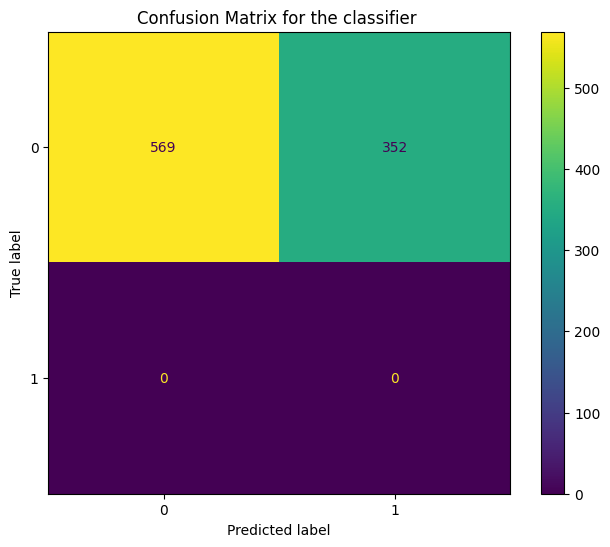

In [11]:
#Gaussian Naive Bayes classifiers with data separated by manual method 80% , 20%
manual_split_1=gaussine(x_train,x_test,y_train,y_test)


Multinomial Naive Bayes classifiers with (a) data

Multinomial Naive Bayes accuracy: 0.7231270358306189
Multinomial Naive Bayes classifier confusion matrix:


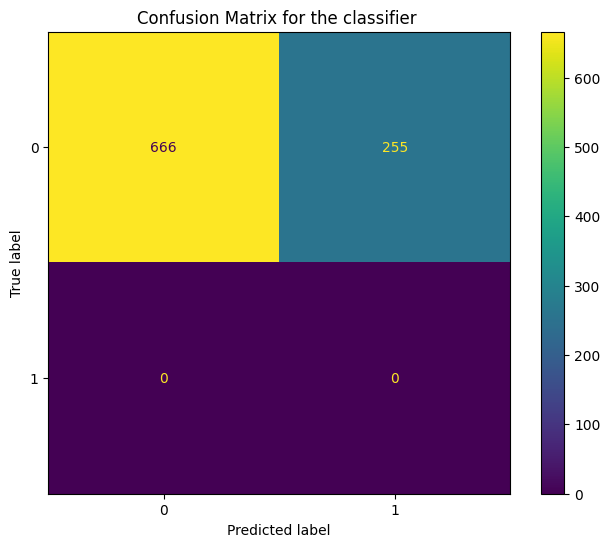

In [12]:
#Multinomial Naive Bayes classifiers with data separated by manual method 80% , 20%
manual_split_2=multinomial(x_train,x_test,y_train,y_test)

# Evaluate with spliting  function data for two classifier (b)

 Gaussian Naive with (b) data

Gaussian Naive Bayes accuracy: 0.8208469055374593
Gaussian Naive Bayes confusion matrix:


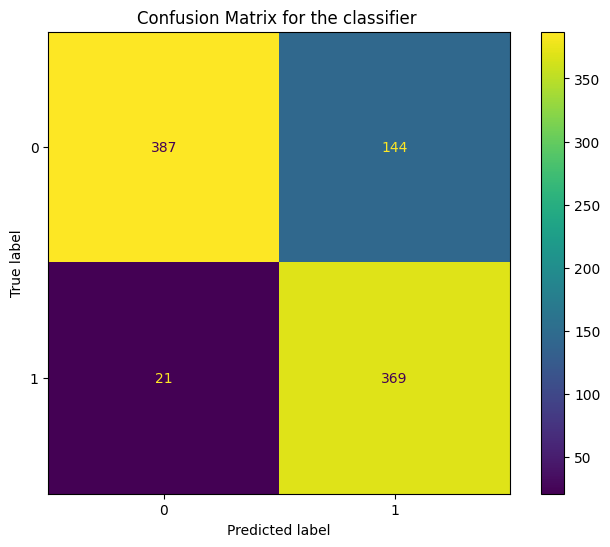

In [13]:
#Gaussian Naive Bayes classifiers with data separated by a function 80% , 20%
data_with_function_1=gaussine(X_trainf, X_testf, y_trainf, y_testf)

Multinomial Naive Bayes classifiers with (b) data

Multinomial Naive Bayes accuracy: 0.7861020629750272
Multinomial Naive Bayes classifier confusion matrix:


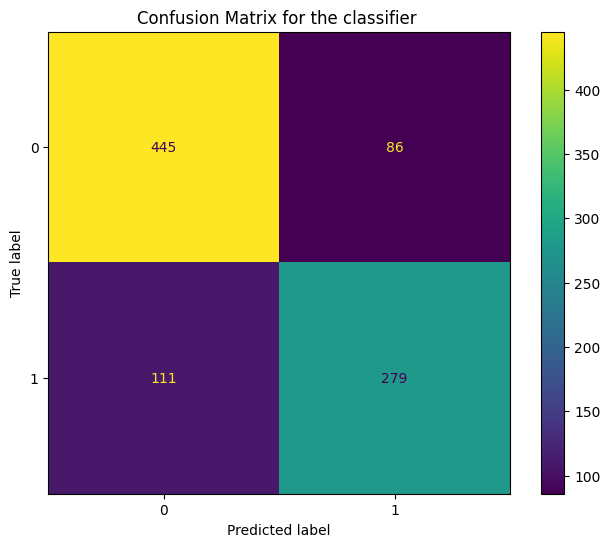

In [14]:
#Multinomial Naive Bayes classifiers with data separated by a function 80% , 20%
data_with_function_2=multinomial(X_trainf,X_testf,y_trainf,y_testf)

#(c)

Bernoulli Naive Bayes classifier:

Brenoulli Naive Bayes classifier accuracy: 0.8805646036916395
Brenoulli Naive Bayes classifier confusion matrix:


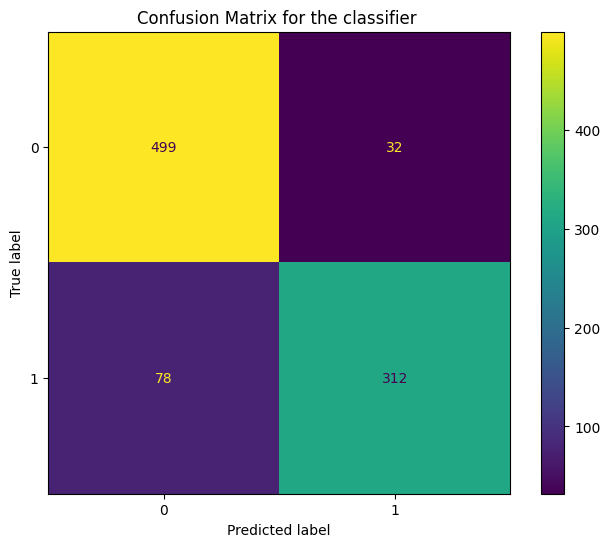

In [15]:
#Bernoulli Naive Bayes classifiers with data separated by a function 80% , 20%
data_with_function_3=brenoulli(X_trainf,X_testf,y_trainf,y_testf)

# (c)

Gaussian Naive Bayes accuracy: 0.8208469055374593
Multinomial Naive Bayes accuracy: 0.7861020629750272
Brenoulli Naive Bayes classifier accuracy: 0.8805646036916395


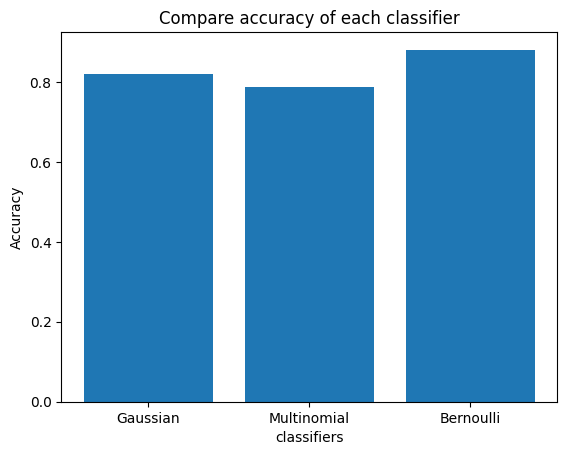

In [16]:
# compare between accuracy of 3 classifier
acc_Gaussian= data_with_function_1
acc_Multinomial = data_with_function_2
acc_Bernoulli = data_with_function_3[2]
print('Gaussian Naive Bayes accuracy:',acc_Gaussian )

print('Multinomial Naive Bayes accuracy:', acc_Multinomial )
print('Brenoulli Naive Bayes classifier accuracy:',  acc_Bernoulli)

# Create the data
accuracy = np.array([acc_Gaussian , acc_Multinomial ,  acc_Bernoulli])
labels = ["Gaussian", "Multinomial", "Bernoulli"]

# Create the bar chart
plt.bar(labels, accuracy)

# Add a title and labels
plt.title("Compare accuracy of each classifier")
plt.xlabel("classifiers")
plt.ylabel("Accuracy")

# Show the plot
plt.show()

# classification report  for the selected classifier

Brenoulli Naive Bayes classifier accuracy: 0.8805646036916395
Brenoulli Naive Bayes classifier confusion matrix:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90       531
         1.0       0.91      0.80      0.85       390

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.88       921
weighted avg       0.88      0.88      0.88       921



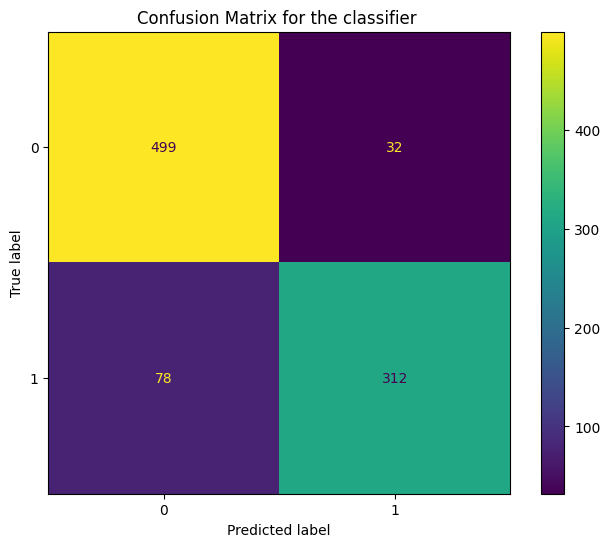

In [17]:
f=classification_report_bernoulli(X_trainf,X_testf,y_trainf,y_testf)

#D

# training selected model with the subset data (d)

Brenoulli Naive Bayes classifier accuracy: 0.0
Brenoulli Naive Bayes classifier confusion matrix:


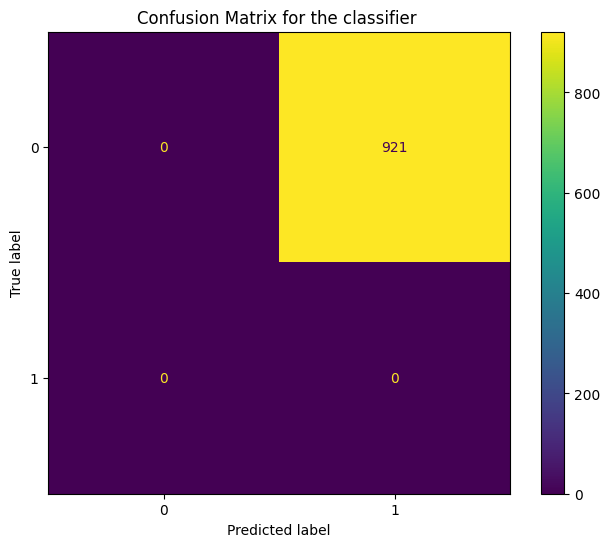

In [18]:
# for first subset

A=brenoulli(x_train1,x_test0, y_train1 , y_test0)
acc_Bernoulli_1 = A[2]


Brenoulli Naive Bayes classifier accuracy: 0.6438653637350705
Brenoulli Naive Bayes classifier confusion matrix:


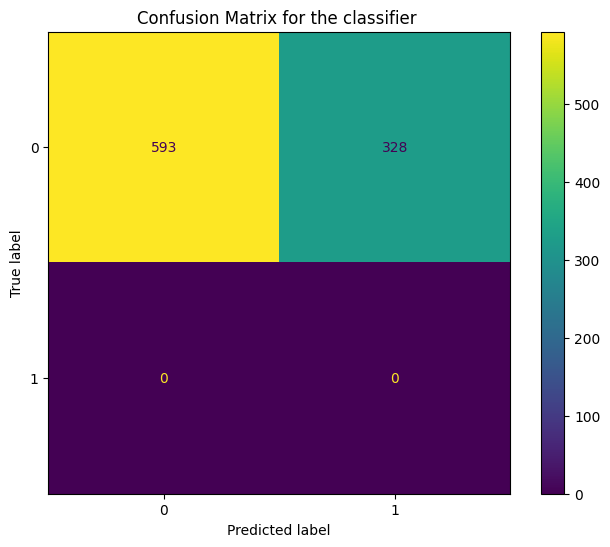

In [19]:
# for second subset

B=brenoulli(x_train2, x_test0, y_train2 ,  y_test0)

acc_Bernoulli_2 = B[2]

Brenoulli Naive Bayes classifier accuracy: 1.0
Brenoulli Naive Bayes classifier confusion matrix:


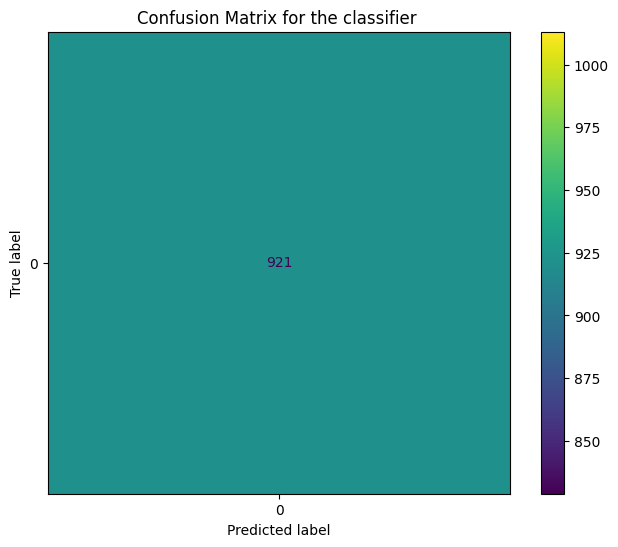

In [20]:
# for third subset

C=brenoulli(x_train3, x_test0, y_train3 , y_test0)
acc_Bernoulli_3 = C[2]

Brenoulli Naive Bayes classifier accuracy: 0.0
Brenoulli Naive Bayes classifier confusion matrix:


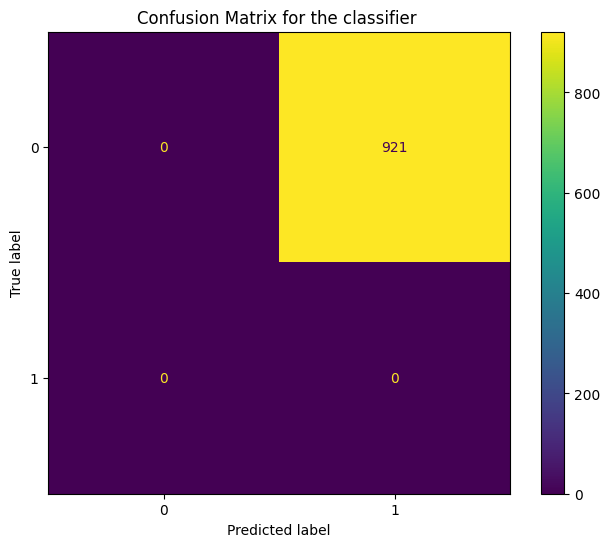

In [24]:
# for fourth subset

D=brenoulli(x_train4, x_test0, y_train4 , y_test0)
acc_Bernoulli_4 = D[2]

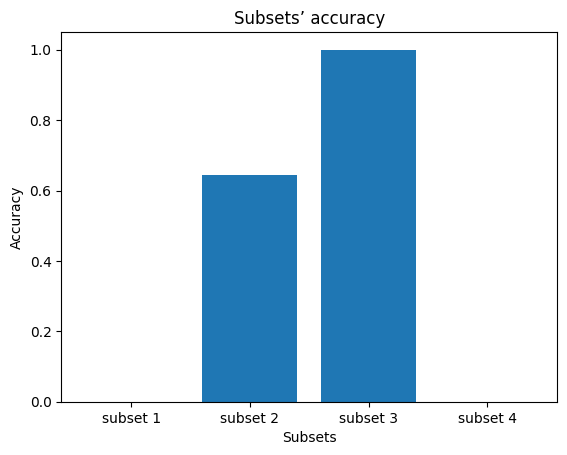

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Create the data
accuracy = np.array([acc_Bernoulli_1,acc_Bernoulli_2,acc_Bernoulli_3, acc_Bernoulli_4])
labels = ["subset 1", "subset 2", "subset 3", "subset 4"]

# Create the bar chart
plt.bar(labels, accuracy)

# Add a title and labels
plt.title("Subsets’ accuracy")
plt.xlabel("Subsets")
plt.ylabel("Accuracy")

# Show the plot
plt.show()


# data in each subset (additional part)

In [36]:
x_train1,x_test0, y_train1 , y_test0

(array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 3.756e+00, 6.100e+01,
         2.780e+02],
        [2.100e-01, 2.800e-01, 5.000e-01, ..., 5.114e+00, 1.010e+02,
         1.028e+03],
        [6.000e-02, 0.000e+00, 7.100e-01, ..., 9.821e+00, 4.850e+02,
         2.259e+03],
        ...,
        [0.000e+00, 0.000e+00, 3.200e-01, ..., 1.494e+00, 1.000e+01,
         1.390e+02],
        [0.000e+00, 0.000e+00, 0.000e+00, ..., 9.186e+00, 1.260e+02,
         9.370e+02],
        [0.000e+00, 0.000e+00, 2.400e-01, ..., 2.868e+00, 4.400e+01,
         1.750e+02]]),
 array([[  0.   ,   0.   ,   0.   , ...,   1.   ,   1.   ,   3.   ],
        [  0.   ,   0.   ,   0.   , ...,   1.   ,   1.   ,   3.   ],
        [  0.   ,   0.   ,   0.   , ...,   1.   ,   1.   ,   4.   ],
        ...,
        [  0.3  ,   0.   ,   0.3  , ...,   1.404,   6.   , 118.   ],
        [  0.96 ,   0.   ,   0.   , ...,   1.147,   5.   ,  78.   ],
        [  0.   ,   0.   ,   0.65 , ...,   1.25 ,   5.   ,  40.   ]]),
 array([1., 1., 

In [37]:
x_train2, y_train2

(array([[  0.   ,   0.   ,   0.32 , ...,   1.494,  10.   , 139.   ],
        [  0.   ,   0.   ,   0.32 , ...,   1.494,  10.   , 139.   ],
        [  0.78 ,   0.   ,   0.78 , ...,   2.627,  22.   , 113.   ],
        ...,
        [  0.   ,   0.   ,   2.12 , ...,   2.647,  16.   ,  45.   ],
        [  0.   ,   0.   ,   0.   , ...,   1.142,   2.   ,   8.   ],
        [  0.   ,   0.   ,   0.   , ...,   1.909,   5.   ,  21.   ]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.,

In [38]:
x_train3, y_train3

(array([[  0.   ,   0.   ,   0.   , ...,   1.   ,   1.   ,   7.   ],
        [  0.   ,   0.   ,   0.   , ...,   2.322,  11.   ,  72.   ],
        [  0.   ,   0.   ,   0.   , ...,   1.689,  10.   ,  49.   ],
        ...,
        [  0.   ,   0.   ,   0.   , ...,   2.258,  15.   , 192.   ],
        [  0.   ,   0.   ,   0.   , ...,   2.303,  15.   , 129.   ],
        [  0.   ,   0.   ,   0.   , ...,   4.208,  15.   , 101.   ]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.,

In [39]:
x_train4, y_train4

(array([[  0.   ,   0.   ,   1.19 , ...,   2.724,  13.   ,  79.   ],
        [  0.   ,   0.   ,   0.   , ...,   1.792,  12.   , 224.   ],
        [  0.   ,   0.   ,   0.   , ...,   3.   ,  11.   ,  81.   ],
        ...,
        [  0.   ,   0.   ,   0.   , ...,   3.901,  33.   , 398.   ],
        [  0.   ,   0.   ,   0.   , ...,   1.   ,   1.   ,   3.   ],
        [  0.   ,   0.   ,   0.   , ...,   1.   ,   1.   ,   4.   ]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.,

# what's the result i will get if i shuffel the data (additional part)

split the data with function

In [46]:
# Download the Spambase dataset from the UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data1 = np.loadtxt(url, delimiter=",")
# splitting with function
# Split the data into the data and target variables
x = data1[:, :-1]                                                                 # The shape of the x data is:  (4601 ,57) and datatype numpy.ndarray
y = data1[:, -1]                                                                  # The shape of the y data is:  (4601 ,1) and datatype numpy.ndarray
# split data into train and test
X_training, X_testing, y_training, y_testing = train_test_split(x, y, test_size=0.2, random_state=42)

# calculate the start/end of trainning samples:
num_training_samples_1 = int(0.25* len(X_training))           # 920
num_training_samples_2 = int(0.5* len(X_training))             # 1840
num_training_samples_3 =int(0.75* len(X_training))            # 2760
num_training_samples_4 =int(1* len(X_training))               # 3680
print(num_training_samples_1, num_training_samples_2 , num_training_samples_3 ,num_training_samples_4)


# first 25% from( 0:920)
x_train1 = X_training[:num_training_samples_1 , :]
y_training1 = y_training [:num_training_samples_1]

# second 25%   from( 920: 1840 )
x_train2 = X_training[num_training_samples_1 : num_training_samples_2  , :]
y_training2 = y_training [num_training_samples_1 : num_training_samples_2]

# third 25%     from( 1840: 2760 )
x_train3 = X_training[num_training_samples_2 : num_training_samples_3  , :]
y_training3 = y_training [num_training_samples_2 : num_training_samples_3]

# fourth 25%    from( 2760: 3680 )
x_train4 = X_training[num_training_samples_3 : num_training_samples_4  , :]
y_training4 = y_training [num_training_samples_3 : num_training_samples_4]


920 1840 2760 3680


Brenoulli Naive Bayes classifier accuracy: 0.8762214983713354
Brenoulli Naive Bayes classifier confusion matrix:
Brenoulli Naive Bayes classifier accuracy: 0.8805646036916395
Brenoulli Naive Bayes classifier confusion matrix:
Brenoulli Naive Bayes classifier accuracy: 0.8783930510314875
Brenoulli Naive Bayes classifier confusion matrix:
Brenoulli Naive Bayes classifier accuracy: 0.8729641693811075
Brenoulli Naive Bayes classifier confusion matrix:


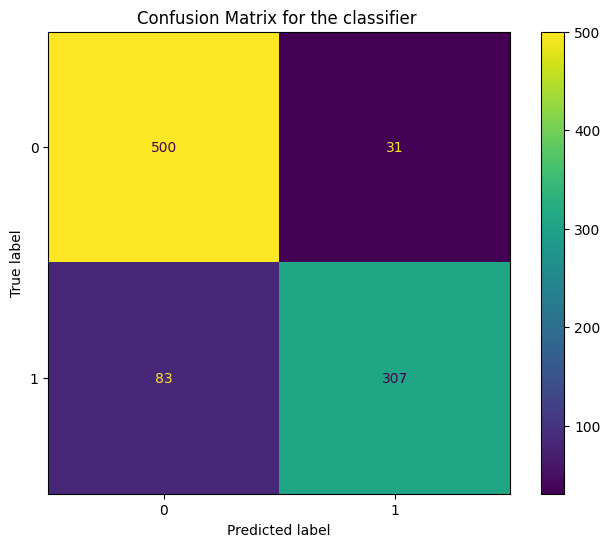

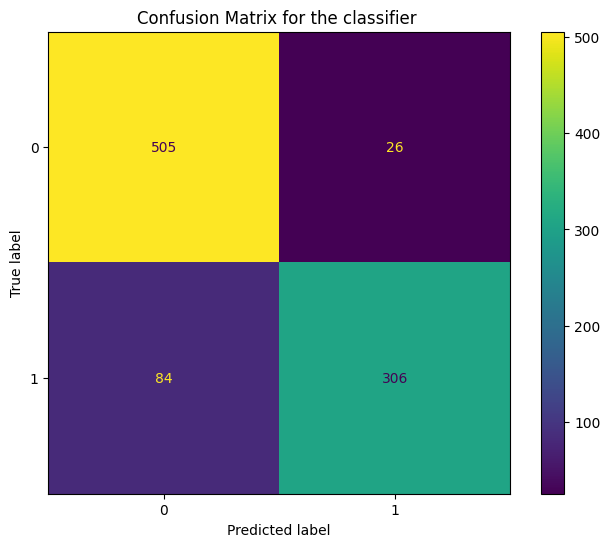

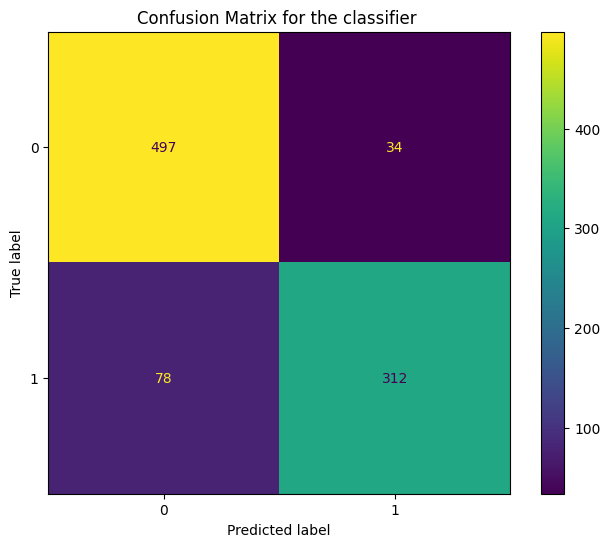

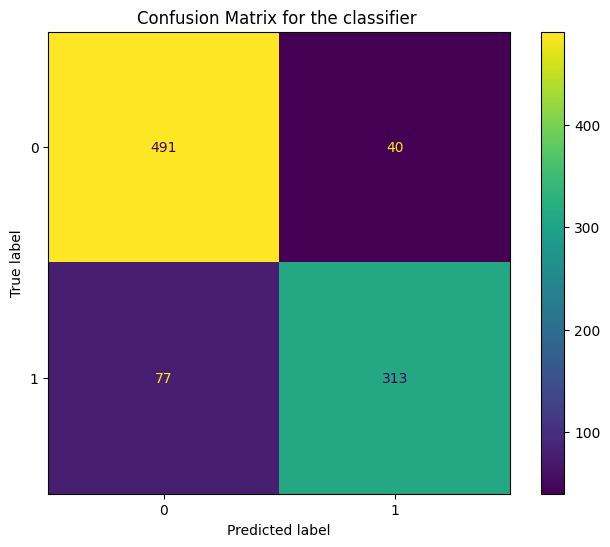

In [44]:
# for first subset
A1=brenoulli(x_train1,X_testing,y_training1,y_testing)
# for second subset
B1=brenoulli(x_train2,X_testing,y_training2,y_testing)
# for third subset
C1=brenoulli(x_train3,X_testing,y_training3,y_testing)
# for fourth subset
D1=brenoulli(x_train4,X_testing,y_training4,y_testing)




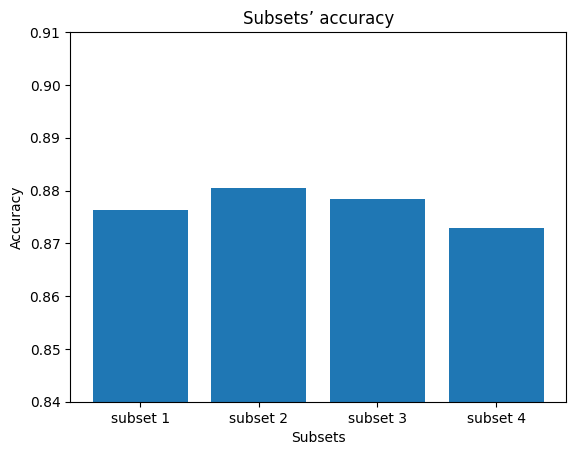

In [45]:
# Create the data
accuracy = np.array([A1[2],B1[2],C1[2], D1[2]])
labels = ["subset 1", "subset 2", "subset 3", "subset 4"]

# Create the bar chart
plt.bar(labels, accuracy)

# Add a title and labels
plt.title("Subsets’ accuracy")
plt.xlabel("Subsets")
plt.ylabel("Accuracy")

# Set the y scale to be larger than the first one
plt.ylim([0.84, 0.91])

# Show the plot
plt.show()
